**Group 03**

Ishani Kothari  - 0748393

Jahnabi Kashyap - 0769172

Jovin Louis     - 0753655

Mohamed Tabsheer - 0771288

# Lab 4: Building an Image Classifier from Scratch

The main goal of this lab is to create an image classifier from scratch using the Keras package. You will create a binary classifier based on an object type of your choice. The classifier will accept images and then predict whether or not a given image contains that object. For example, if you chose your object to be a cat, then the classifier would accept images and predict 1 if it believes there is a cat in the image or a 0 if not. 

You will build and train a classifier in two ways: 
- first using the original data set that you create, and 
- second, using data augmentation techniques. 

**Grading:** 

50% of the grade will come from error-free code that accomplishes all the steps outlined in the instructions for each part of this lab and written in Python/Keras. The other 50% will come from the comments associated with that code, where the comments explain what the code is doing and why it is important to the overall objective. Thus, comments like "split the data" or "train the model" would receive a grade of 0 as they do not indicate any understanding.

**Research Required:** 

To complete this lab successfully you will need to some research. At the very least, you will need to implement the [`ImageDataGenerator` class](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) and the [`.flow_from_directory` method](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory). 

**What to submit:**
- A copy of this notebook with:
    - Error-free code in Python/Keras
    - All code cells executed and output visible
- Include a zipped file of your images



## Part 1: Prep Work
### Choose an Object

**You may choose any object other than a cat**. Try to think of an object that is readily available for taking pictures and, preferably, outdoors, as that will add to the natural variability to the data.

### Create a Dataset

Take 80 pictures of the chosen object and 80 pictures of other things that are not your object. Each group member should supply a roughly equal number of pictures so as to increase variability in your dataset. 

From these 160 images you will create a training set (50 object/50 not object), a validation set (15 object/15 not object), and a test set (15 object/15 not object).

It's best if your dataset is diverse, so take pictures of the chosen **object** with, for example, different lighting, from different angles, different distances from camera, different examples of the same type of object. Similarly for the **not object** images: try to include a variety of objects in different ways. 

## Part 2: Using the Original Data

### Dataset Verification

You should verify that the training, validation, and test sets have the correct number of images (the `os` functions should help with this) and that the data is organized in `train`, `validation`, and `test` folders. 

### Dataset Loading and Processing with Image Data Generators

You should now create image data generators for your training, validation, and test datasets that will allow you to feed them into your model in batches. The images should be resized to 148x148 pixels and scaled so all pixel values are between 0 and 1. 

You should then use the training data generator to print out some examples of the training images and corresponding labels. 

### Create and Evaluate a Model

Build a convolutional neural network and use the validation loss and accuracy to select the best architecture and hyperparameters so that you can maximize the validation accuracy. 

Any overfitting should be addressed; that is, if your model begins overfitting after epoch 3, you should not quote validation accuracy after epoch 15. And, appropriate attempts should be made to reduce/eliminate the overfitting to improve overall model generalizability. 

### Report Accuracy on Test Set 

Your final step is to make predictions using the test set and report the final test set accuracy. 

In [2]:
#over here we are importing all required libraries for this lab

import os
import glob
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from random import randrange
from pathlib import Path
import numpy as np
import PIL.Image
import tensorflow as tf
from PIL import Image, ImageOps
from PIL import Image
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# This library is used for mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Creating a variable where we can store images path
lab4 = ('/content/drive/MyDrive/lab4_image')

# printing folders within root directory
os.listdir(lab4)

['Valid', 'Test', 'Train']

In [4]:
#creating a variable for train,test and valid folder

train_image = '/content/drive/MyDrive/lab4_image/Train'
valid_image = '/content/drive/MyDrive/lab4_image/Valid'
test_image = '/content/drive/MyDrive/lab4_image/Test'



In [5]:
# printing images in test cups folder to check
os.listdir('/content/drive/MyDrive/lab4_image/Test/cups')

['20211018_175512.jpg',
 'IMG_2554.JPG',
 '20211018_175925.jpg',
 '20211018_175532.jpg',
 'IMG_2553.JPG',
 '20211018_174754.jpg',
 '20211018_175851.jpg',
 '20211018_175523.jpg',
 '20211018_175519.jpg',
 '20211018_175902.jpg',
 'IMG_2556.JPG',
 'IMG_2558.JPG',
 'IMG_2559.JPG',
 'IMG_2557.JPG',
 'IMG_2555.JPG']

In [6]:
#for augmenting images in real time we are using ImageDataGenerator this will rescal images in 0 and 1
image_gen = ImageDataGenerator(rescale=1./255)


In [7]:

#creating batch size as 10
BATCH_SIZE = 10

#we are resizing image as 148*148 and class mode as binary using image data generator
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,directory=train_image,target_size=(148,148),class_mode='binary')
test_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,directory=test_image,target_size=(148,148),class_mode='binary')
valid_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,directory=valid_image,target_size=(148,148),class_mode='binary')




Found 100 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


Picture Lable: 0.0


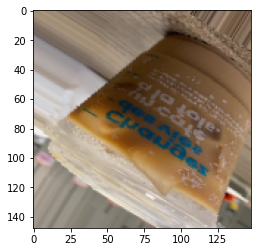

Picture Lable: 1.0


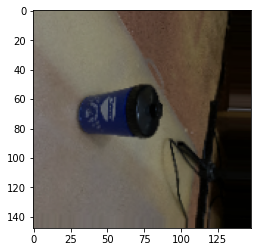

Picture Lable: 1.0


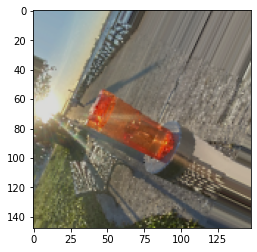

Picture Lable: 0.0


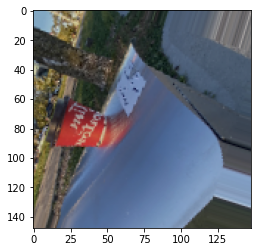

Picture Lable: 0.0


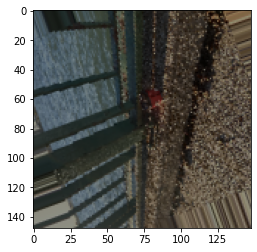

Picture Lable: 1.0


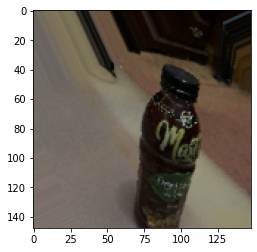

Picture Lable: 1.0


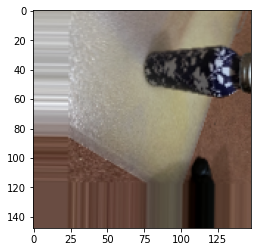

Picture Lable: 0.0


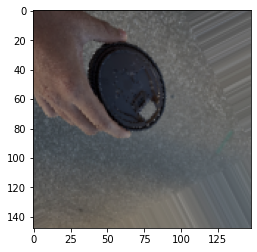

Picture Lable: 0.0


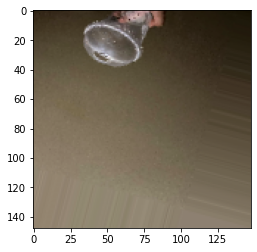

In [57]:
#creating a plot


#here we are trying to see some images.we gave 9 as a range so it will print 9 images from datasets
import matplotlib.pyplot as plt

x,y = train_data_gen.next()

def plot_image(picture):
  plt.imshow(picture)
  plt.show()

for i in range(9):
  picture = x[i]
  print('Picture Lable:',y[i])
  plot_image(picture)

In [26]:

##creating a model
# Here we are importing libraries for creating model
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten      
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import models,layers 
from tensorflow.keras.regularizers import l2

# We created a model with the Maxpooling, Flatten, and we tried to use relu and sigmoid as activation fuunction with padding as same. Along with input shape as given 148*148.

model3 = models.Sequential()
model3.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same', input_shape=(148 , 148,3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu', input_shape=(148 , 148,3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3),padding='valid', activation='relu', input_shape=(148 , 148,3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(24, (3, 3), activation='relu',padding='same', input_shape=(148 , 148,3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(48, (3, 3),padding='same', activation='relu', input_shape=(148 , 148,3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(112, (3, 3),padding='same', activation='relu', input_shape=(148 , 148,3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(132,activation='relu'))
model3.add(layers.Dense(1,activation='sigmoid'))
model3.summary()





Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 74, 74, 32)        4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 35, 35, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 17, 17, 24)       

In [27]:
#here we are compiling a model using nadam as a optimizer 
model3.compile(optimizer = 'nadam' , loss='binary_crossentropy', metrics=['accuracy'])

#here we are fitting a model
history = model3.fit(train_data_gen, 
                    epochs=8, 
                    batch_size=128, 
                    validation_data=(valid_data_gen),
                    verbose=1)

Epoch 1/8
10/10 [==============================] - 99s 3s/step - loss: 0.6925 - accuracy: 0.4900 - val_loss: 0.6959 - val_accuracy: 0.5000
Epoch 2/8
10/10 [==============================] - 25s 3s/step - loss: 0.6959 - accuracy: 0.4000 - val_loss: 0.6903 - val_accuracy: 0.8333
Epoch 3/8
10/10 [==============================] - 25s 3s/step - loss: 0.6915 - accuracy: 0.6200 - val_loss: 0.6737 - val_accuracy: 0.8333
Epoch 4/8
10/10 [==============================] - 25s 3s/step - loss: 0.7125 - accuracy: 0.6300 - val_loss: 0.6480 - val_accuracy: 0.7000
Epoch 5/8
10/10 [==============================] - 25s 3s/step - loss: 0.6220 - accuracy: 0.6800 - val_loss: 0.4497 - val_accuracy: 0.8000
Epoch 6/8
10/10 [==============================] - 25s 2s/step - loss: 0.5378 - accuracy: 0.7700 - val_loss: 0.5644 - val_accuracy: 0.6667
Epoch 7/8
10/10 [==============================] - 25s 2s/step - loss: 0.4394 - accuracy: 0.8200 - val_loss: 0.4164 - val_accuracy: 0.7333
Epoch 8/8
10/10 [==========

In [31]:
#reporting accuracy on test dataset
accuracy = model3.evaluate(test_data_gen,batch_size=1)
print("\n Test Loss:\n " + str(accuracy[0]))
print("\nTest Accuracy:\n" + str(accuracy[1]*100) + "%")

3/3 [==============================] - 14s 6s/step - loss: 0.8695 - accuracy: 0.5333

 Test Loss:
 0.869502067565918

Test Accuracy:
53.33333611488342%


## Part 3: Using Data Augmentation

### Dataset Verification

You should verify that the training, validation, and test sets have the correct number of images (the `os` functions should help with this) and that the data is organized in a folder structure that will work with your image data generators. 

### Dataset Loading and Processing with Create Image Data Generators

You should now create image data generators for your training, validation, and test datasets that will allow you to feed them into your model in batches. The images should be resized to 148x148 pixels and scaled so all pixel values are between 0 and 1. 

### Add Data Augmentation 

You should now add data augmentation to your training data generator. All available types of augmentation should be used. 

Print an image and examples of the same image augmented in different ways. (The `.load_img()` and [`.flow()` method](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow) may be helpful here.)

### Create and Evaluate a Baseline Model

Use the best model from **Part 2** to train with the augmented data and evaluate on the validation data to get a baseline accuracy for the new model trained on the augmented dataset. 

### Tune the Model

With a more complex training set, you may be able to improve the accuracy through adjustments to the baseline model architecture and tuning the hyperparameters. 

### Report Accuracy on Test Set 

Your final step is to make predictions using the test set and report the final test set accuracy. 

In [32]:
#creating a variable for train,test and valid folder

train_image = '/content/drive/MyDrive/lab4_image/Train'
valid_image = '/content/drive/MyDrive/lab4_image/Valid'
test_image = '/content/drive/MyDrive/lab4_image/Test'



In [33]:
# printing images in test not_cup folder
os.listdir('/content/drive/MyDrive/lab4_image/Test/not_cup')

['IMG_4132.JPG',
 'IMG_4131.JPG',
 'IMG_4130.JPG',
 'IMG_4152.JPG',
 'IMG_4162.JPG',
 'IMG_4161.JPG',
 'IMG_4160.JPG',
 'IMG_4159.JPG',
 'IMG_4158.JPG',
 'IMG_4157.JPG',
 'IMG_4156.JPG',
 'IMG_4155.JPG',
 'IMG_4165.JPG',
 'IMG_4164.JPG',
 'IMG_4163.JPG']

In [51]:
## horizontal_flip will flip image horizontally,vertical_flip will flip images vertically
image_gen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,rotation_range=48,height_shift_range=0.2, width_shift_range=0.2,  # It will shift image width with given range.
                               brightness_range=[1.0,0.5],fill_mode='nearest') 

#creating a batch size as 10
BATCH_SIZE = 10

#we are resizing image as 148*148 and class mode as binary using image data generator
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,directory=train_image,target_size=(148,148),class_mode='binary')
test_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,directory=test_image,target_size=(148,148),class_mode='binary')
valid_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,directory=valid_image,target_size=(148,148),class_mode='binary')


Found 100 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


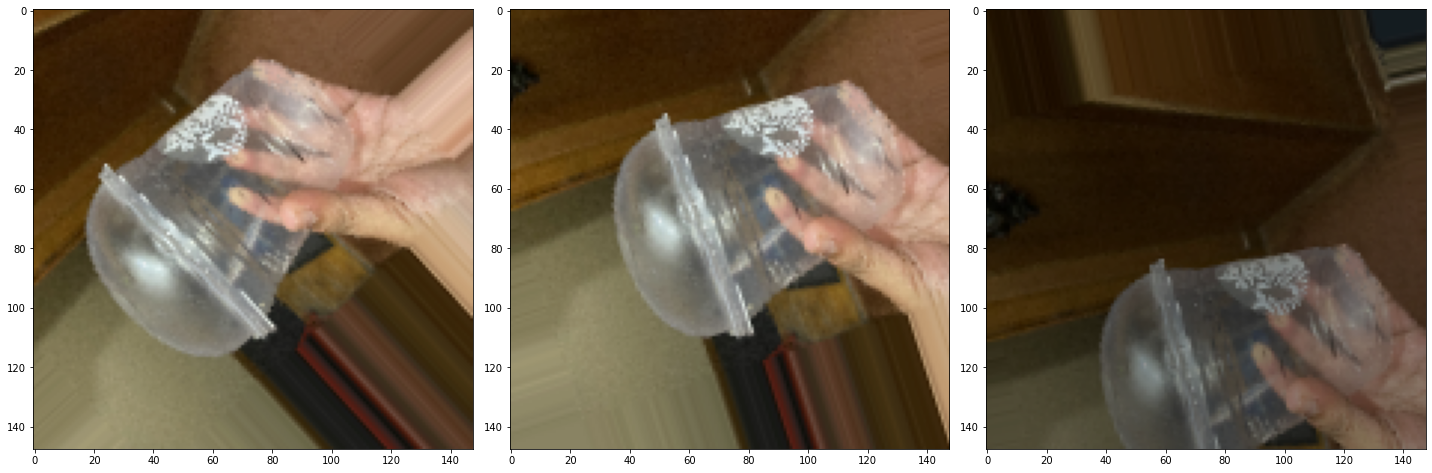

In [52]:
#doing data augmentation

#this will genrate 3 different plots using 20*20 image size
def plot_Images(x):
    fig, axes = plt.subplots(1, 3, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(x, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

#this will flip image from training dataset
flip = [train_data_gen[0][0][0] for i in range(3)] 
plot_Images(flip)

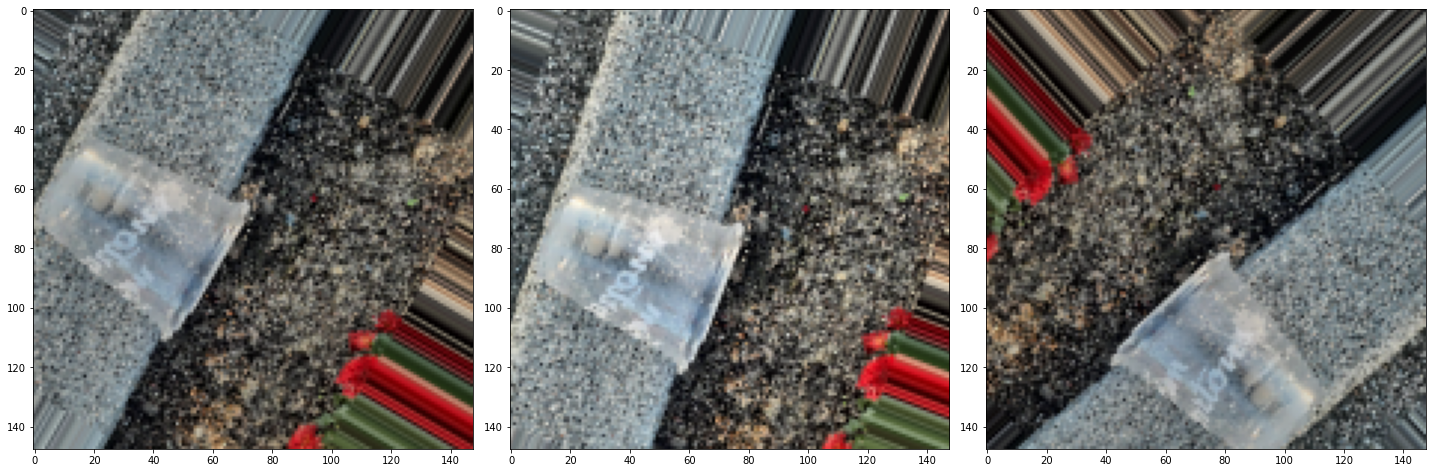

In [53]:
#this will rotate the images from test dataset

rotation = [test_data_gen[0][0][0] for i in range(5)]
plot_Images(rotation)


In [58]:
#Here we are creating a model 

# We created a model with the Maxpooling, Flatten, and we tried to use relu and sigmoid as activation fuunction with padding as same. Along with input shape as given 148*148.
model4 = models.Sequential()
model4.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same', input_shape=(148 , 148,3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu', input_shape=(148 , 148,3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3),padding='same', activation='relu', input_shape=(148 , 148,3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(24, (3, 3), activation='relu',padding='same', input_shape=(148 , 148,3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(48, (3, 3),padding='same', activation='relu', input_shape=(148 , 148,3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(112, (3, 3),padding='same', activation='relu', input_shape=(148 , 148,3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(132,activation='relu'))
model4.add(layers.Dense(1,activation='sigmoid'))
model4.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 74, 74, 32)        4640      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 18, 18, 24)       

In [59]:
#here we are compiling a model
model4.compile(optimizer = 'nadam' , loss='binary_crossentropy', metrics=['accuracy'])

#here we are fitting a model on train data set along with that checking validation accuracy also.
history = model4.fit(train_data_gen, 
                    epochs=8, 
                    batch_size=128, 
                    validation_data=(valid_data_gen),
                    verbose=1)

Epoch 1/8
10/10 [==============================] - 29s 3s/step - loss: 0.7310 - accuracy: 0.5000 - val_loss: 0.6926 - val_accuracy: 0.5667
Epoch 2/8
10/10 [==============================] - 25s 3s/step - loss: 0.6942 - accuracy: 0.4800 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 3/8
10/10 [==============================] - 25s 3s/step - loss: 0.6930 - accuracy: 0.4800 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 4/8
10/10 [==============================] - 25s 3s/step - loss: 0.6946 - accuracy: 0.5000 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 5/8
10/10 [==============================] - 25s 3s/step - loss: 0.6938 - accuracy: 0.4700 - val_loss: 0.6917 - val_accuracy: 0.6667
Epoch 6/8
10/10 [==============================] - 25s 3s/step - loss: 0.6932 - accuracy: 0.5200 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 7/8
10/10 [==============================] - 25s 3s/step - loss: 0.6932 - accuracy: 0.5100 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 8/8
10/10 [==========

In [60]:
#reporting accuracy on test dataset
accuracy = model3.evaluate(test_data_gen,batch_size=1)
print("\n Test Loss:\n " + str(accuracy[0]))
print("\nTest Accuracy:\n" + str(accuracy[1]*100) + "%")

3/3 [==============================] - 6s 2s/step - loss: 0.9752 - accuracy: 0.4667

 Test Loss:
 0.9751822352409363

Test Accuracy:
46.666666865348816%
